### Creación del entorno virtual.
<p>Al activar el entorno en el juypter notebook se instalan paquetes como el ipykernel.<p>

In [ ]:
#!conda create -n cargoalto
%conda activate cargoalto
%conda install requests
%conda install pandas
%conda install -c conda-forge selenium

### Imports necesarios.

In [153]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
import time
import matplotlib.pyplot as plt 
import numpy as np

### Iniciar la página con selenium y rechazar las cookies.

In [ ]:

driver = webdriver.Firefox()

URL = "https://transparencia.xunta.gal/tema/transparencia-institucional/goberno-e-altos-cargos/administracion-xeral"
driver.get(URL)

try:
    cookies = driver.find_element(By.CLASS_NAME, 'cm-btn-danger')
    cookies.click()
    time.sleep(2)
except Exception as e:
    print("Error:", e)


presidencia = driver.find_elements(By.CLASS_NAME,'contedor__titulo')

# a = driver.find_elements(By.CLASS_NAME, 'contedor__altoCargo')

# a


<p>Canto costa ao contrbuínte cada Consellería?<p>

In [ ]:
df = pd.read_csv('ejemplo.csv')

df.groupby('Conselleria')['salario_total_anual'].sum()

Conselleria
Cultura Lingua e Xuventude                                  74468.64
Economía e Industria                                        83395.02
Educación Ciencia Universidades e Formación Profesional     79199.94
Emprego Comercio e Emigración                               93355.36
Facenda e Administración Pública                            84746.82
Mar                                                         76189.74
Medio Ambiente e Cambio Climático                           74468.64
Medio Rural                                                 79985.82
Política Social e Igualdade                                 74468.64
Presidencia da Xunta                                        91407.90
Sanidade                                                    87442.74
Vivenda e Planificación de Infraestruturas                  79439.28
Xustiza e Deportes                                         153655.08
Name: salario_total_anual, dtype: float64

In [163]:
df

,Nombre,Conselleria,salario_total_anual
0,Alfonso Rueda Valenzuela,Presidencia da Xunta,91407.90
1,Beatriz Cuiña Barja,Xustiza e Deportes,78179.34
2,Francisco Javier Abad Pardo,Xustiza e Deportes,75475.74
3,Ángeles Vázquez Mejuto,Medio Ambiente e Cambio Climático,74468.64
4,Román Rodríguez González,Educación Ciencia Universidades e Formación Pr...,79199.94
5,Fabiola García Martínez,Política Social e Igualdade,74468.64
6,María Jesús Lorenzana Somoza,Economía e Industria,83395.02
7,Miguel Corgos López-Prado,Facenda e Administración Pública,84746.82
8,María Martínez Allegue,Vivenda e Planificación de Infraestruturas,79439.28
9,Antonio Gómez Caamaño,Sanidade,87442.74


<p>Canto costan en total os altos cargos a Galicia?<p>

In [ ]:
print(f"{df['salario_total_anual'].sum()} €")

1132223.62 €


<p>Cal é a persona con maior salario total anual, en qué consellería traballa e canto gaña<p>

In [102]:
df.sort_values(by='salario_total_anual',ascending=False).head(1)

,Nombre,Conselleria,salario_total_anual
11,José González Vázquez,Emprego Comercio e Emigración,93355.36


<p>Saca un análise automático con medias,percentiles,etc dos salarios totais anuais.<p>

In [116]:
print(f"media: {df['salario_total_anual'].mean()} €") 

print(f"mediana: {df['salario_total_anual'].median()} €") 

print(f"salario más alto: {df['salario_total_anual'].max()} €") 

print(f"salario más bajo: {df['salario_total_anual'].min()} €") 


media: 80873.11571428573 €
mediana: 79319.61 €
salario más alto: 93355.36 €
salario más bajo: 74468.64 €


<p>Fai un gráfico de barras con matplotlib do coste de cada Consellería.<p>

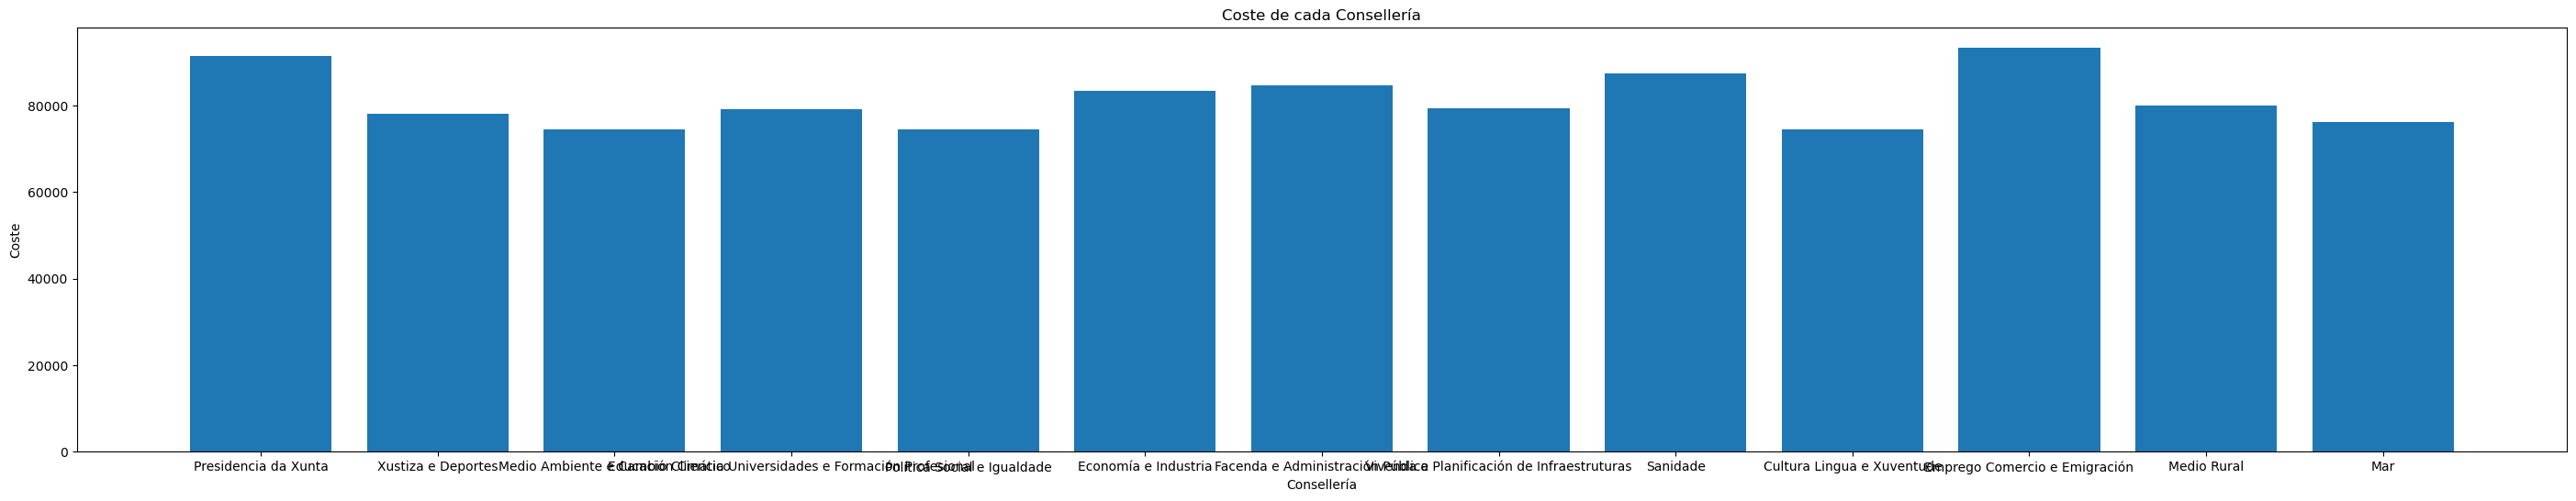

In [168]:
x = df['Conselleria']
y = df['salario_total_anual']

plt.figure(figsize=(35,6))
plt.xlabel('Consellería')
plt.ylabel('Coste')
plt.title("Coste de cada Consellería")
plt.bar(x,y)

plt.show()
